In [47]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [48]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

#### Logistic regression hypothesis
#### $$ h_{\theta}(x) = g(\theta^{T}x)$$
#### $$ g(z)=\frac{1}{1+e^{−z}} $$

In [45]:
data = loaddata("ex2data1.txt", ",")

Dimensions:  (100, 3)
[[ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]]


In [4]:
X = np.c_[np.ones((data.shape[0])),data[:,:2]]
y = np.c_[data[:,2:]]

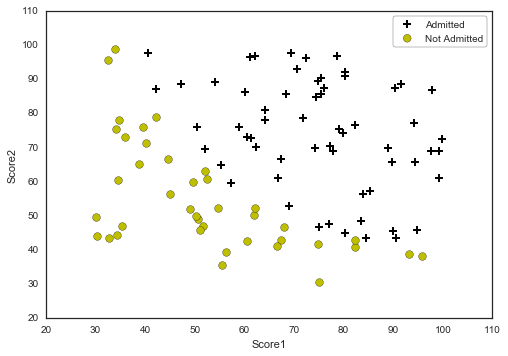

In [5]:
neg = data[:,2]==0
pos = data[:,2]==1
axes = plt.gca()
axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label="Admitted")
axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label="Not Admitted")
axes.set_xlabel("Score1")
axes.set_ylabel("Score2")
axes.legend(frameon= True, fancybox = True);

In [6]:
import scipy

In [7]:
scipy.special.expit

<ufunc 'expit'>

#### Cost Function
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$
#### Vectorized Cost Function
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

In [8]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [9]:
def costFunction(theta, X, y):
    m = y.size
    h = scipy.special.expit(X.dot(theta))
#     Instead use sigmoid function defined above
    J = (-1/m)*(np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y))
    if np.isnan(J[0]):
        return np.inf
    return J[0]

In [13]:
costFunction(initial_theta, X, y)

0.69314718055994518

In [11]:
def gradient(theta, X, y):
    m = y.size
    h = scipy.special.expit(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

In [12]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.69314718056
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


In [46]:
initial_theta = np.zeros(X.shape[1])
initial_theta

array([ 0.,  0.,  0.])

In [55]:
initial_theta.reshape(-1,1)

array([[ 0.],
       [ 0.],
       [ 0.]])

In [14]:
optimizeCF = minimize(costFunction,initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})
optimizeCF

      fun: 0.2034977015894407
 hess_inv: array([[  3.24739469e+03,  -2.59380769e+01,  -2.63469561e+01],
       [ -2.59380769e+01,   2.21449124e-01,   1.97772068e-01],
       [ -2.63469561e+01,   1.97772068e-01,   2.29018831e-01]])
      jac: array([ -2.73305338e-10,   1.43144024e-07,  -1.58965804e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 23
     njev: 28
   status: 0
  success: True
        x: array([-25.16133401,   0.20623172,   0.2014716 ])

In [41]:
def predict(theta, X):
    threshold = 0.5
    p = scipy.special.expit(X.dot(theta.T)) >= threshold
    return(p.astype(int))

In [20]:
optimizeCF.x

array([-25.16133401,   0.20623172,   0.2014716 ])

In [21]:
grad

array([ -0.1       , -12.00921659, -11.26284221])

In [26]:
scipy.special.expit(np.array([1, 45, 85]).dot(optimizeCF.x.T))

0.77629066133254754

In [38]:
scipy.special.expit(np.array([1, 75, 75]).dot(optimizeCF.x.T))

0.99557660706979478

In [42]:
p = predict(optimizeCF.x, X) 
p

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1])

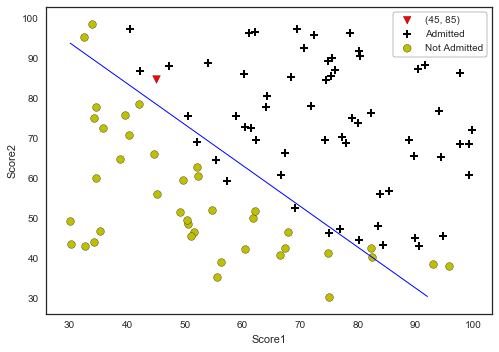

In [70]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
neg = data[:,2]==0
pos = data[:,2]==1
axes = plt.gca()
axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label="Admitted")
axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label="Not Admitted")
axes.set_xlabel("Score1")
axes.set_ylabel("Score2")
axes.legend(frameon= True, fancybox = True);
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(optimizeCF.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

In [63]:
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

In [69]:
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(optimizeCF.x))
h

array([  2.77027020e-06,   3.71577984e-06,   4.98399592e-06, ...,
         9.99999611e-01,   9.99999710e-01,   9.99999784e-01])